#         **<span style="color:Green">Name: Sushmeetha Chakkathara Karthigeyan</span>**
#                    Student ID : 15277062
#                        Course : MSc Data Science
#                    Module Name: Principles of Data Science 
#                    Module Code: 7144CEM  
#               Assignment Title: Individual Coursework 

## *Task 1. Markov Chains*
### A manufacturing company has 200 identical machines that are used to create some particular product.  The possible state of each machine is Idle (awaiting work), Working (on a task), Broken, or in Repair.  Each machine is monitored every hour to determine its status. Suppose after each hour, 5% of the Idle machines remain Idle, 93% of Idle machines are now Working, and 2% of Idle machines are now Broken.  For Working machines, 10% become Idle, 86% stay Working, and 4% become Broken.  For Broken machines, 80% remain Broken and 20% become in Repair.  For machines in Repair, 50% become Idle, 10% become Working, and 40% remain in Repair. 

### (1) Construct a 4 × 4 transition matrix 𝐴 (as a numpy array) to model the state of the machines as a Markov chain.

In [1]:
import numpy as np # Importing numpy library

**Constructing a transition matrix A to model the state of the machines**

**States:**

Idle-5%, Idle-10%, Idle-0%, Idle-50%

Working-93%, Working-86%, Working-0%, Working-10%

Broken-2%, Broken-4%, Broken-80%, Broken-0%

Repair-0%, Repair-0%, Repair-20%, Repair-40%

In [2]:
A=np.array([[0.05, 0.10, 0.00, 0.50],      
            [0.93, 0.86, 0.00, 0.10],     
            [0.02, 0.04, 0.80, 0.00],      
            [0.00, 0.00, 0.20 , 0.40]])    

In [3]:
print(A) # Viewing the array

[[0.05 0.1  0.   0.5 ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]]


### (2)  Suppose that all 200 machines are initially Working.  Use numpy to calculate how many machines we would expect to see in each state at the end of each hour for the next 24 hours.  Use Python to plot your results on a line graph showing one line for each state, together with a legend.  Clearly comment on what you observe.  Use numpy to find the eigenvectors of the transition matrix 𝐴 from part (1), and explain how one of these eigenvectors is related to the number of machines we would expect to see in each state in the “long-run steady state”. 

In [4]:
initial_working_state= np.array([0,200,0,0]) # 200 machines in "Working state"

In [5]:
working_states=[initial_working_state] # Storing the results

In [6]:
print(initial_working_state) # Viewing the initial_working_state 

[  0 200   0   0]


In [7]:
print(working_states)  # Viewing the working_states

[array([  0, 200,   0,   0])]


In [8]:
# Calculating the machine states over 24 hours
for hours in range(24):
    new_state =A@working_states[-1]
    working_states.append(new_state)

In [9]:
working_states[-1] # Viewing the working states at the end of 24 hours

array([ 19.99684961, 140.03120459,  29.98248595,   9.98945986])

In [10]:
working_states=np.array(working_states) # Converting to numpy array to plot

In [11]:
print(working_states)

[[  0.         200.           0.           0.        ]
 [ 20.         172.           8.           0.        ]
 [ 18.2        166.52        13.68         1.6       ]
 [ 18.362      160.2932      17.9688       3.376     ]
 [ 18.63542    155.266412    21.154008     4.94416   ]
 [ 18.9304922  151.35447092  23.50657128   6.2084656 ]
 [ 19.1862045  148.3910493   25.2380457    7.1847005 ]
 [ 19.3907654  146.17794263  26.50980263   7.92148934]
 [ 19.5480772  144.53859142  27.44277511   8.47055626]
 [ 19.66654113 143.32995605  28.12672529   8.87677753]
 [ 19.75471143 142.44132321  28.6279093    9.17605607]
 [ 19.81989593 141.78902519  28.9950746    9.39600429]
 [ 19.86789946 141.3106653   29.2640186    9.55741663]
 [ 19.90316982 140.96006032  29.46099948   9.67577037]
 [ 19.92904971 140.70317685  29.6052654    9.76250805]
 [ 19.94802419 140.51499912  29.71092038   9.8260563 ]
 [ 19.96192927 140.37716738  29.78829676   9.8726066 ]
 [ 19.9721165  140.27621883  29.84496269   9.90670199]
 [ 19.9795

In the above output, we can observe that the 200 machines are distributed in each machine state over the period of 24 hours

In [12]:
# ploting in line graph

In [13]:
import matplotlib.pyplot as plt

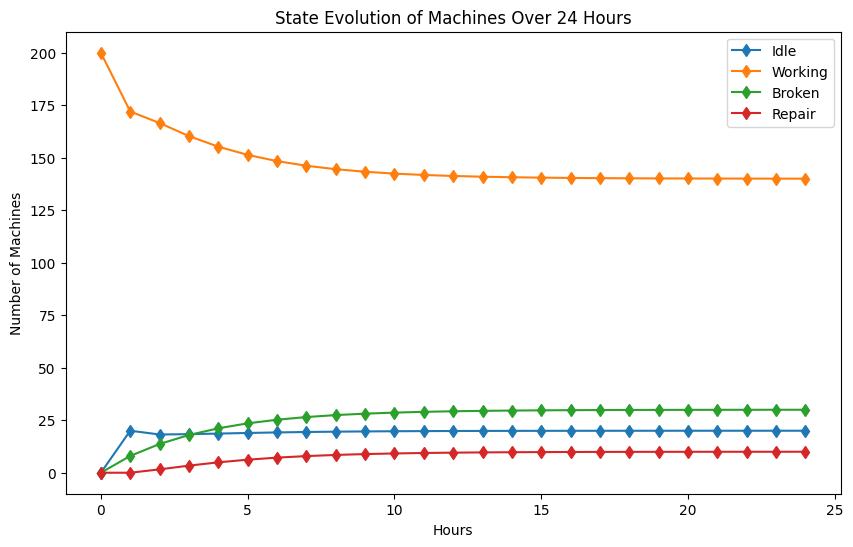

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(working_states[:,0],marker="d",label="Idle")
plt.plot(working_states[:,1],marker="d",label="Working")
plt.plot(working_states[:,2],marker="d",label="Broken")
plt.plot(working_states[:,3],marker="d",label="Repair")
plt.xlabel("Hours")
plt.ylabel("Number of Machines")
plt.title("State Evolution of Machines Over 24 Hours")
plt.legend()
plt.show()

Marker type reference- https://uk.mathworks.com/help/matlab/creating_plots/specify-line-and-marker-appearance-in-plots.html

**Observations**
1. The number of machines in each state stabilizes gradually- Steady-state distribution
2. During the 24 hours, the number of machines in the working states is higher than the other states.
3. The Idle state line represents, the machines waiting for a task , stabilizes eventually at around 20 machines.


In [15]:
V,P=np.linalg.eig(A) # Function for finding Eigenvalues and Eigenvectors
# V - Eigenvalues
# P - Eigenvector

In [16]:
print(V) 

[-0.05659878  1.          0.73232996  0.43426882]


The Eigenvalues(V) is a 1-dimensional array : shape(n,)

Reference:(Harris et al., 2020)

In [17]:
print(P)

[[ 0.70224021 -0.13801311  0.0841534   0.33700315]
 [-0.71170273 -0.96609178 -0.83353499 -0.83629975]
 [ 0.01683788 -0.20701967  0.46783381  0.07303705]
 [-0.00737535 -0.06900656  0.28154778  0.42625955]]


The Eigenvectors(P) is a 2-dimensional array : shape(n,n)

Reference:(Harris et al., 2020)

In [18]:
#Calculating the steady-state distribution
# **Reference**: OpenAI. (2024). *ChatGPT* (November 6 Version) [Large language model]. OpenAI.
steady_state=P[:,np.isclose(V,1)].real.flatten()
steady_state /= steady_state.sum()
steady_state_approx = steady_state * 200  # Scale to 200 machines

print("Steady-state distribution:", steady_state_approx)

Steady-state distribution: [ 20. 140.  30.  10.]


**Observation**

 The above output represents that in long run, we would expect:
 20,140,30 and 10 machines to be Idle, Working ,Broken and Repaired repectively

In [19]:
# when the eigen values are 1, the resulting eigen vectors is the number of machines i.e., column 2

In [20]:
# The resulting steady_state_approx will provide the approximate number of machines in each state in the long run.

### (3) Suppose the machines are in the “long-run steady state” from part (2) when the manufacturing company is sold to new owners.  The new owners introduce a policy that any Idle machine will be switched off and prepared to be sold. 

### (a) Modify the transition matrix 𝐴 from part (1) to include this new policy and estimate the number of hours until there are fewer than 20 Working machines.

In [21]:
A_new=np.array([
    [1.00,0.93,0.02,0.00], # idle will be switched off
    [0.00,0.86,0.04,0.00],
    [0.00,0.00,0.80,0.20],
    [0.00,0.10,0.00,0.40]
])

In [22]:
working_states=np.array([0,200,0,0]) # Initially 200 machines are in the working state

In [23]:
initial_working_state = np.array([0, 200, 0, 0])
working_states_new = [initial_working_state]
hours = 0

In [24]:
while initial_working_state[1]>=20:
    initial_working_state=A_new @ initial_working_state
    working_states_new.append(initial_working_state)
    hours+=1
print("The number of hours until there are fewer than 20 Working machines: ",hours,"Hours")

The number of hours until there are fewer than 20 Working machines:  17 Hours


### (b The expected number of hours needed for a machine starting from state 𝑖 to reach state 𝑘 for the first time can be calculated using matrix operations and is denoted 𝜇𝑖𝑘.  For a particular destination state 𝑘, let 𝑁 be the transition matrix from part (3)(a) but with row 𝑘 and column 𝑘 both deleted, and let 𝐼 be the 3 × 3 identity matrix.  The sum of each column of the matrix (𝐼 − 𝑁)−1 gives the values 𝜇𝑖𝑘.  Use this method to find the expected time needed for a machine to become Idle (and therefore switched off) for the first time, for each of the other possible states that a machine could start from.  Clearly comment on what you observe.

In [25]:
N = A_new[1:, 1:]

In [56]:
# Identity matrix of the same size as N
I = np.eye(N.shape[0])

In [57]:
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [58]:
# Calculate (I - N)^(-1)
I_minus_N_inv = np.linalg.inv(I - N)

In [59]:
print(I_minus_N_inv)

[[7.5  1.5  0.5 ]
 [1.25 5.25 1.75]
 [1.25 0.25 1.75]]


In [60]:
# Sum each column of (I - N)^(-1) to get expected times to reach the Idle state
mean_first_passage_times = I_minus_N_inv.sum(axis=0)

In [75]:
print("Expected time needed to reach Idle from Working:", mean_first_passage_times[0])
print("Expected time needed to reach Idle from Broken:", mean_first_passage_times[1])
print("Expected time needed to reach Idle from Repair:", mean_first_passage_times[2])

Expected time needed to reach Idle from Working: 10.0
Expected time needed to reach Idle from Broken: 7.000000000000002
Expected time needed to reach Idle from Repair: 4.000000000000001


Observations and Detailed Interpretation
Working to Idle – 10.0 hours:

Machines in the Working state take the longest, with an average of 10 hours to reach the Idle state.
This indicates that Working machines tend to stay operational for extended periods before transitioning to Idle.
The 10-hour average aligns with the high probability (0.86) that Working machines stay in their state each hour, making it the most stable state.
This delay may be desirable for a manufacturing setting, as it keeps machines productive and minimizes downtime.
Broken to Idle – 7.0 hours:

Machines in the Broken state reach Idle faster than those in Working, averaging 7 hours.
This slightly shorter time reflects that Broken machines have a 20% chance of moving to Repair, with Repair leading more directly to Idle.
The 7-hour average suggests that although Broken machines are more likely to require repair before being decommissioned, they still move towards Idle faster than Working machines.
This trend indicates that once machines are broken, they follow a pathway that leads to Idle relatively sooner, emphasizing maintenance needs for broken equipment.
Repair to Idle – 4.0 hours:

Machines in the Repair state reach Idle the quickest, in 4 hours on average.
This shorter duration results from the 50% probability of transitioning from Repair to Idle each hour.
The quick transition from Repair to Idle suggests an efficient shutdown process once machines enter Repair. This could be due to either a final assessment or preparation for disposal.
The repair state acts as a final step for machines before being shut down, minimizing further investment in machines already deemed non-functional.

(4) Adapting the Markov Chain Model for Disease Spread

Adapting the Model
To model the spread of an infectious disease using a Markov chain, we can redefine each state to represent different stages of disease progression. Here’s how we can map the machine states to a disease model:

Define the Disease States:

Idle (Vulnerable): This state represents individuals who are healthy but at risk of infection.
Working (Infected): Individuals in this state have contracted the disease and are actively spreading it.
Broken (Severe): These individuals have developed severe symptoms, requiring isolation or quarantine to prevent further spread.
Repair (Recover): This state represents individuals who have recovered from the infection, potentially gaining immunity.
Set Transition Probabilities:

We can assign transition probabilities between these states based on typical disease progression:
Susceptible to Infected: Probability of contracting the disease based on exposure.
Infected to Severe/Quarantined: Probability of developing severe symptoms or needing isolation.
Infected to Recovered/Immune: Probability of recovering from the disease.
Severe/Quarantined to Recovered/Immune: Probability of recovery after severe infection.
The specific probabilities would depend on factors like infection rate, recovery rate, and quarantine effectiveness.

In [80]:
states = ["Vulnerable", "Infected", "Severe", "Recovered"]
no_states = len(states)


In [81]:
Disease_matrix=np.array([
    [0.85, 0.15, 0.00, 0.00],  # Vulnerable: 15% chance of infection
    [0.00, 0.60, 0.25, 0.15],  # Infected: 25% to Severe, 15% recovery
    [0.00, 0.00, 0.75, 0.25],  # Severe: 25% recovery rate
    [0.10, 0.00, 0.00, 0.90]   # Recovered: 5% susceptible again
])

In [82]:
pop_distribution=np.array([1000,0,0,0])

In [83]:
num_time_steps=30

In [84]:
population_over_time = np.zeros((num_time_steps, no_states))
population_over_time[0] = pop_distribution

In [85]:
for t in range(1, num_time_steps):
    population_over_time[t] = population_over_time[t-1] @ Disease_matrix

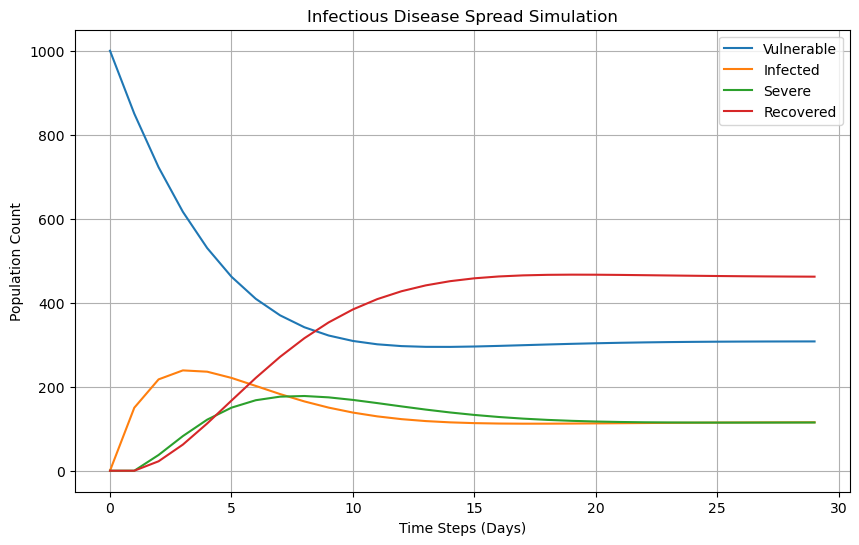

In [86]:
plt.figure(figsize=(10, 6))
for i in range(no_states):
    plt.plot(population_over_time[:, i], label=states[i])

plt.xlabel("Time Steps (Days)")
plt.ylabel("Population Count")
plt.title("Infectious Disease Spread Simulation")
plt.legend()
plt.grid(True)
plt.show()

Weakness of Using a Markov Chain for Disease Spread with Birth and Death Rates
While this adaptation helps model population stability, there are still limitations:

Fixed Transition Probabilities (With Birth-Death Dynamics):
Challenge: Even with a balanced birth-death rate, Markov models still assume that the rate of transition between states is fixed. In reality, birth and death rates fluctuate and can be influenced by external factors like healthcare improvements or changes in disease severity.
Impact: A fixed birth-death assumption might work in a short timeframe, but over longer periods, variations in these rates could lead to inaccuracies, especially if an outbreak significantly increases mortality or immunity wanes differently than expected.
Thus, while the Markov chain model provides a basic structure, this fixed probability approach lacks the flexibility to accurately account for real-world variability in birth and death rates over extended periods.

## Task 2 - Eigenfaces 


### (1) Use numpy to find the mean of each row of Xsub and reshape as a 4096 ×1 vector (call this  xbar).  Adapt the Python code below to visualise this “mean face” and carefully compare it to the image stored in the column of Xsub corresponding to the last two digits of your Student ID.  Clearly comment on what you observe. 

In [26]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [28]:
import sklearn.datasets 
faces = sklearn.datasets.fetch_olivetti_faces() 
Xall = faces.data.T 
print(Xall.shape) 
print(Xall.min(), Xall.max()) 
Xsub = Xall[:,0:200] 
print(Xsub.shape) 


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/arjunrao/scikit_learn_data
(4096, 400)
0.0 1.0
(4096, 200)


In [29]:
print(len(Xall[1]))

400


In [30]:
np.mean(Xall[1,0:200])

0.46830577

(1) Find the mean of each row of Xsub

In [127]:
xbar = np.mean(Xsub, axis=1)


In [128]:
print(xbar.shape)

(4096,)


In [129]:
xbar.reshape((4096, 1))

array([[0.4269837 ],
       [0.46830577],
       [0.5155785 ],
       ...,
       [0.29330584],
       [0.27586797],
       [0.26657033]], dtype=float32)

(-0.5, 63.5, 63.5, -0.5)

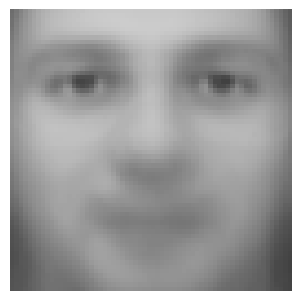

In [130]:
mean_face = xbar.reshape((64, 64)) # Since a single array cannot be visualized properly,we need to reshape it into nXm matrix
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(mean_face, cmap=plt.cm.gray, vmin=0, vmax=1) 
plt.axis("off")

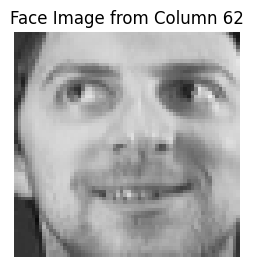

In [35]:
student_id_image = Xsub[:, 62].reshape((64, 64)) # student ID is 15277062
plt.subplot(1, 2, 2)
plt.imshow(student_id_image, cmap="gray", vmin=0, vmax=1)
plt.title(f"Face Image from Column 62")
plt.axis("off")
plt.show()

Observations:

The mean face image will likely appear blurred, as it represents the average features of many different faces.
The individual face (column 62) should have more distinct and sharper features compared to the mean face.

(2) Calculating the Covariance Matrix and Eigenfaces

In [92]:
Xsub.shape

(4096, 200)

In [106]:
C=np.cov(Xsub - xbar) # Calculate covariance matrix of Xsub

In [107]:
C.shape

(4096, 4096)

In [108]:
V,P = np.linalg.eigh(C)
# V- Eigenvalues
# P-Eigenvectors corresponding to V

In [109]:
print(V.shape)

(4096,)


In [110]:
print(P.shape)

(4096, 4096)


In [111]:
print(V)

[-3.46435595e-15 -2.01392142e-15 -1.86068840e-15 ...  6.07176890e+00
  9.67348136e+00  1.42951287e+01]


In [112]:
print(P)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.18538199e-03
  -4.99949723e-04 -2.23654451e-02]
 [ 1.75239009e-01 -2.44801017e-02 -7.72037536e-02 ...  5.62899594e-03
  -3.36315719e-03 -2.47510636e-02]
 [-5.72546056e-01 -6.29021396e-02 -1.05123107e-01 ...  3.78907578e-03
  -6.67817068e-03 -2.72893335e-02]
 ...
 [-5.78288070e-03  1.03924337e-02  2.81835788e-02 ... -8.32625264e-03
  -4.99994662e-03  3.40281963e-02]
 [-5.79336804e-03  1.06065077e-02 -2.43440248e-03 ... -6.05548972e-03
  -3.81475766e-03  2.99766136e-02]
 [ 1.58512668e-03 -5.69385503e-04  1.29738996e-02 ... -2.98388983e-03
  -3.72215360e-03  2.83048390e-02]]


In [113]:
V=V[::-1] # reverse order of eigenvalues and eigenvectors to be in descending order

In [114]:
P=P[:,::-1]

[-0.03287468 -0.02439534 -0.01081859 ... -0.03308582 -0.03034299
 -0.02992527]


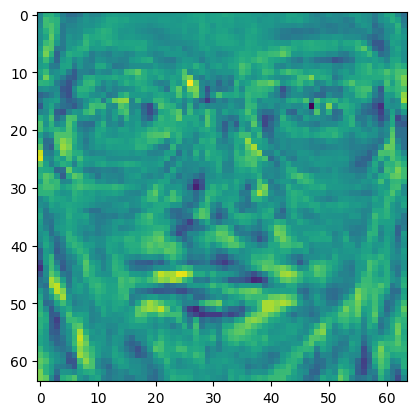

In [162]:
print(P[:, 3])
plt.imshow(P[:, 100].reshape(64,64))

In [116]:
orthogonal_checking = np.allclose(P @ P.T,np.eye(P.shape[0]))

In [117]:
print(orthogonal_checking)

True


In [118]:
# visualize the top 8 eigenfaces

Eigenvalue of Eigenface 1 = 14.295128742276843
Eigenvalue of Eigenface 2 = 9.673481362427628
Eigenvalue of Eigenface 3 = 6.071768895902876
Eigenvalue of Eigenface 4 = 3.839748274138264
Eigenvalue of Eigenface 5 = 2.747252715879231
Eigenvalue of Eigenface 6 = 2.680605960859889
Eigenvalue of Eigenface 7 = 2.107020264793075
Eigenvalue of Eigenface 8 = 1.840428612772853


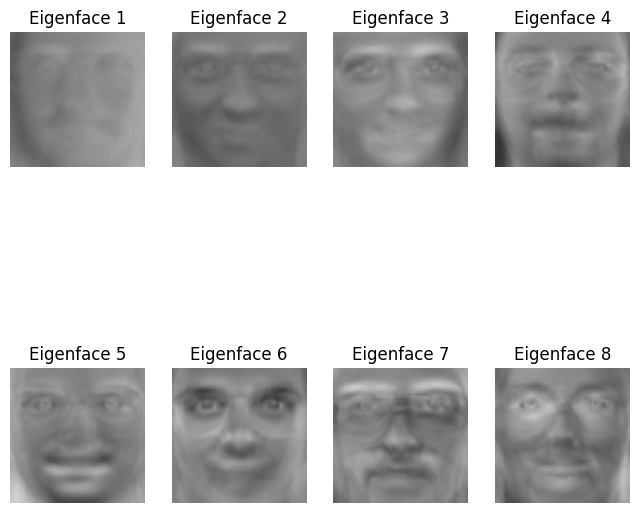

Is P orthogonal? True


In [120]:
plt.figure(figsize=(8, 8))
for i in range(8):
    eigenface = P[:, i].reshape((64, 64))
    eigenvalue=V[i]
    plt.subplot(2, 4, i + 1)
    plt.imshow(eigenface, cmap="gray", vmin=-0.1, vmax=0.1)
    plt.title(f"Eigenface {i + 1}")
    print(f"Eigenvalue of Eigenface {i + 1} = {eigenvalue}")
    plt.axis("off")
plt.show()
print("Is P orthogonal?", orthogonal_checking)

Eigenfaces 
corresponding to the 8 largest eigenvalues (be careful with vmin and vmax).  Clearly comment 
on what you discover in terms of facial features and differences between the images.
1. distinctive features are highlighted as white - represented  by eigenvectors/principle components

(3) Face Reconstruction Using Eigenfaces

In [51]:
# Step 1: Project faces in Xsub into eigenface space

In [131]:
xbar =np.mean(Xsub, axis=1).reshape((4096,1))

In [141]:
Ysub = P.T @ (Xsub-xbar)

In [144]:
Ysub.shape

(4096, 200)

In [133]:
print(len(Xsub-xbar))

4096


In [134]:
print(len(P.T))

4096


In [135]:
P.shape

(4096, 4096)

In [136]:
# Step 2: Reconstruct any face (e.g, column 62) from eigenfaces

In [137]:
xbar.flatten()

array([0.4269837 , 0.46830577, 0.5155785 , ..., 0.29330584, 0.27586797,
       0.26657033], dtype=float32)

In [138]:
face_reconstruct =P@Ysub[:,62] + xbar.flatten()

In [139]:
print(face_reconstruct)

[0.3407105  0.297465   0.54135929 ... 0.33851362 0.17113578 0.35860265]


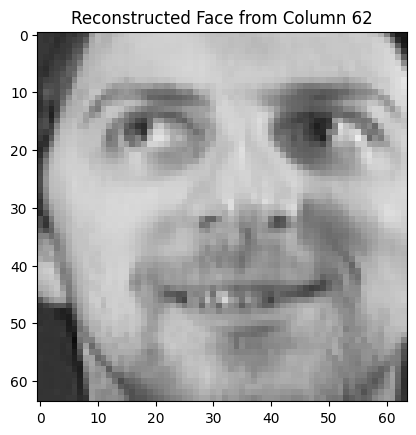

In [ ]:
y = Ysub[:, 62]  # Example column for the face in position 62
reconstructed_face = P @ y + xbar.flatten()
plt.imshow(reconstructed_face.reshape(64, 64), cmap='gray', vmin=0, vmax=1)
plt.title("Reconstructed Face from Column 62")
plt.show()

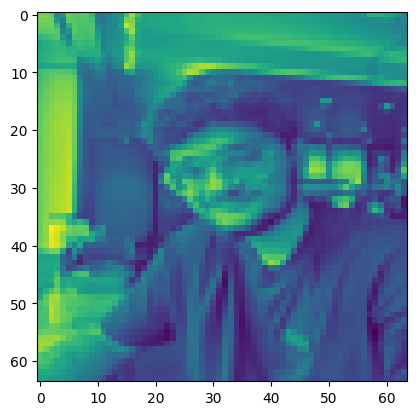

In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image to 64x64
image_path = r"/mnt/d/projects/sandbox/Sandbox/Math and ML/Arbitrary Notebooks  Python Snippets/WhatsApp Image 2024-08-24 at 22.01.56_4443eaec.jpg"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((64, 64))  # Resize to 64x64 pixels

# Convert the image to a numpy array and flatten it
image_me = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
plt.imshow(image_me)

In [90]:
print(image_me)

[[0.78431373 0.79215686 0.74509804 ... 0.58431373 0.50588235 0.47058824]
 [0.77647059 0.77647059 0.78039216 ... 0.49803922 0.44705882 0.4745098 ]
 [0.76078431 0.76078431 0.77254902 ... 0.4627451  0.4627451  0.45882353]
 ...
 [0.67843137 0.66666667 0.62352941 ... 0.21568627 0.15686275 0.18823529]
 [0.61176471 0.61176471 0.6        ... 0.17254902 0.23137255 0.31764706]
 [0.58431373 0.57254902 0.54117647 ... 0.23921569 0.29411765 0.25098039]]


In [ ]:
y_me = P.T @ (image_me.flatten() - xbar)

In [ ]:
y_me.shape

In [ ]:
print("P shape:", P.shape)  # Should be (4096, 4096)
print("y_me shape:", y_me.shape)       # Should be (4096,)
print("xbar shape:", xbar.shape)       # Should be (4096, 1)


In [ ]:
best_k = 10  # Example with 10 eigenfaces
best_reconstruction = (P[:, :best_k] @ y_me[:best_k]) + xbar.flatten()  # Flatten xbar to 1D

In [ ]:
if best_reconstruction.size == 4096:  # Ensure the size is 4096 before reshaping
    plt.imshow(best_reconstruction.reshape(64, 64), cmap='gray', vmin=0, vmax=1)
    plt.title(f"Best Reconstruction with k={best_k}")
    plt.show()
else:
    print("Unexpected size:", best_reconstruction.size)


In [ ]:
<span style="color:pink">This text is blue</span>

In [100]:
import numpy as np
from sklearn.decomposition import PCA

# Generate a random dataset with 100 samples and 10 features
np.random.seed(42)  # For reproducibility
X = np.random.randn(100, 10)  # 100 samples, 10 features

print(X)
# Step 1: Mean center the data (important for PCA)
X_centered = X - np.mean(X, axis=0)

print(X_centered.shape)
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

print(cov_matrix.shape)
# Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)



[[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01  1.52302986e+00
  -2.34153375e-01 -2.34136957e-01  1.57921282e+00  7.67434729e-01
  -4.69474386e-01  5.42560044e-01]
 [-4.63417693e-01 -4.65729754e-01  2.41962272e-01 -1.91328024e+00
  -1.72491783e+00 -5.62287529e-01 -1.01283112e+00  3.14247333e-01
  -9.08024076e-01 -1.41230370e+00]
 [ 1.46564877e+00 -2.25776300e-01  6.75282047e-02 -1.42474819e+00
  -5.44382725e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01]
 [-6.01706612e-01  1.85227818e+00 -1.34972247e-02 -1.05771093e+00
   8.22544912e-01 -1.22084365e+00  2.08863595e-01 -1.95967012e+00
  -1.32818605e+00  1.96861236e-01]
 [ 7.38466580e-01  1.71368281e-01 -1.15648282e-01 -3.01103696e-01
  -1.47852199e+00 -7.19844208e-01 -4.60638771e-01  1.05712223e+00
   3.43618290e-01 -1.76304016e+00]
 [ 3.24083969e-01 -3.85082280e-01 -6.76922000e-01  6.11676289e-01
   1.03099952e+00  9.31280119e-01 -8.39217523e-01 -3.09212376e-01
   3.31263431e-01  9.75545127e-01

In [102]:
eigenvectors.shape

(10, 10)